In [2]:
# Import relevant packages
import pandas as pd
import seaborn as sb
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [173]:
# Load data
pd.set_option('display.max_columns', None)
df = pd.read_csv('medical_clean.csv')

In [174]:
# View dataframe
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [175]:
# View dataframe for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [176]:
# View dataframe for accuracy
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,1.001400,0.398900,34.455299,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,1.008117,0.628505,26.309341,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,2.000000,1.000000,61.161020,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,7.000000,5.000000,71.981490,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [177]:
# Looks like there are no obvious outliers, and no values missing.

In [178]:
df.shape

(10000, 50)

In [179]:
# Let's drop columns we aren't going to use (because they don't hold data we can use).
df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID'], axis = 1, inplace=True)

In [180]:
# I don't want to include other columns for various reasons. State, City, County, and Zip are categorical, and the latter three have hundreds or thousands of different categories. This will overcomplicate the model and dataset, and are also somewhat redunant since we are using Latitude and Longitude. Furthermore, there is likely to be multicollinearity with these variables since they are all related to location.
print(df['County'].nunique())
print(df['City'].nunique())
print(df['Zip'].nunique())
df.drop(['County', 'City', 'Zip', 'State'], axis = 1, inplace=True)

1607
6072
8612


In [181]:
# Job and timezone are other categorical variables with too many categories and/or likely no useful (to the model) information.
df.drop(['Job', 'TimeZone'], axis = 1, inplace=True)

In [182]:
# I also want to drop the TotalCharge column - it is a function of whether or not a person is readmitted, not the other way around.
df.drop(['TotalCharge'], axis = 1, inplace=True)

In [183]:
# Rename the last 8 columns (Items 1-8)
df.rename(columns = {'Item1': 'Timely_admission', 'Item2': 'Timely_treatment', 'Item3': 'Timely_visits', 'Item4': 'Reliability',
                     'Item5': 'Options', 'Item6': 'Hours_of_treatment', 'Item7': 'Courteous_staff', 'Item8': 'Active_listening'}, inplace=True)



In [184]:
# Create dummies for categorical variables
df_cats = df[['Area','Marital','Gender','Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Overweight',
       'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Services', 'Complication_risk', 'BackPain', 'ReAdmis']]
df_dummies = pd.get_dummies(data=df_cats, drop_first=True)
df_new = df.join(df_dummies)

In [185]:
# Drop old categorical columns
df_new.drop(['Area','Marital','Gender','Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Overweight',
       'Arthritis', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
       'Asthma', 'Services', 'Complication_risk', 'BackPain', 'ReAdmis'], axis = 1, inplace=True)

In [186]:
# Rename columns to remove spaces
df_new.columns = df_new.columns.str.replace(' ', '_')

In [187]:
# Define X and y variables
X = df_new[['Initial_days', 'Lat', 'Lng', 'Population', 'Children', 'Age', 'Income', 'Doc_visits', 
'Full_meals_eaten', 'vitD_supp', 'Timely_admission', 'VitD_levels', 'Additional_charges',
'Timely_treatment', 'Timely_visits', 'Reliability', 'Options', 'Hours_of_treatment', 
'Courteous_staff', 'Active_listening', 'Area_Suburban', 'Area_Urban', 'Marital_Married', 
'Marital_Never_Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary', 
'Soft_drink_Yes', 'Initial_admin_Emergency_Admission', 'Initial_admin_Observation_Admission', 
'HighBlood_Yes', 'Stroke_Yes', 'Overweight_Yes', 'Arthritis_Yes', 'Diabetes_Yes', 'Hyperlipidemia_Yes', 
'Anxiety_Yes', 'Allergic_rhinitis_Yes', 'Reflux_esophagitis_Yes', 'Asthma_Yes', 'Services_CT_Scan', 
'Services_Intravenous', 'Services_MRI', 'Complication_risk_Low', 'Complication_risk_Medium', 'BackPain_Yes']]

y = df_new['ReAdmis_Yes']

In [188]:
# Third party code: https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/preprocessing-and-pipelines?ex=11

# Setup the pipeline steps:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(6))]
        
# Create the pipeline:
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# Fit the pipeline to the training set:
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.7715
Accuracy without Scaling: 0.556


In [189]:
y_pred = pipeline.predict(X_test)
y_pred[0:15]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [190]:
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1191   75]
 [ 382  352]]


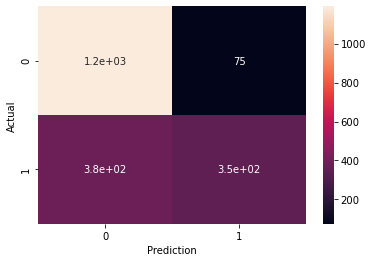

In [191]:
# Confusion matrix in a heat map
graph = sb.heatmap(cf_matrix, annot=True)
graph.set(xlabel="Prediction", ylabel = "Actual");

In [192]:
# Precision score (true positives / true positives + false positives)
precision_score(y_test, y_pred)

0.8243559718969555

In [193]:
# Recall score (true positives / true positives + false negatives)
recall_score(y_test, y_pred)

0.47956403269754766

In [194]:
# Accuracy score (correct/all)
accuracy_score(y_test, y_pred)

0.7715

In [195]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1266
           1       0.82      0.48      0.61       734

    accuracy                           0.77      2000
   macro avg       0.79      0.71      0.72      2000
weighted avg       0.78      0.77      0.75      2000



In [196]:
# Third party code: https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/fine-tuning-your-model?ex=8

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_scaled.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

AUC: 0.8585107894159123
